In [37]:
%pylab inline
import pandas as pd
import pysd

Populating the interactive namespace from numpy and matplotlib


In [29]:
model = pysd.read_vensim('SI.mdl')
result = model.run()
result.head()

,Infected,Susceptible
0.0000,10.000000,9.999990e+06
0.0625,10.312500,9.999990e+06
0.1250,10.634765,9.999989e+06
0.1875,10.967101,9.999989e+06
0.2500,11.309823,9.999989e+06


In [30]:
def test_initial_growth(result):
    """ Ensure that the initial values of the first and second 
    derivative of the infected population are both positive """
    first_deriv = result['Infected'].diff()
    second_deriv = first_deriv.diff()
    if (first_deriv.dropna().iloc[0] > 0 and 
        second_deriv.dropna().iloc[0] > 0):
        return True

test_initial_growth(result)

True

In [31]:
model = pysd.read_vensim('SI.mdl')
result = model.run()
test_initial_growth(result)

True

In [34]:
def any_condition(conditions, test):
    for condition in conditions:
        result = model.run(params=condition)
        if test(result):
            return True
    return False
        
conditions = [{'Initial Infected':i} for i in range(4)]
conditions

[{'Initial Infected': 0},
 {'Initial Infected': 1},
 {'Initial Infected': 2},
 {'Initial Infected': 3}]

In [33]:
any_condition(conditions, test_initial_growth)

True

## Data replication test

In [183]:
model = pysd.read_vensim('SI_cumulative.mdl')

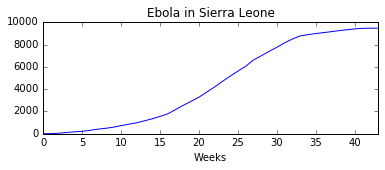

In [184]:
data = pd.read_csv('Ebola_in_SL_Data.csv', index_col='Weeks')
data['Cumulative Cases'].plot(figsize=(6,2))
plt.title('Ebola in Sierra Leone')
plt.savefig('Ebola_SL_Cumulative.png')

In [185]:
import scipy.optimize as opt
model.set_components({'Total Population':5200000.0,
                      'Initial Infected':3.0})

In [186]:
def mape_error(param_list):
    result = model.run({'Contact Rate': param_list[0]})
    return (abs((result - data)/data)).mean()['Cumulative Cases']

mape_error([3])

0.95565883491915427

In [187]:
res = opt.minimize(mape_error, 10, method='L-BFGS-B', bounds=[(0,100)])
res

      fun: 0.78848263725317913
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.04574843])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 7
   status: 0
  success: True
        x: array([ 5.26592354])

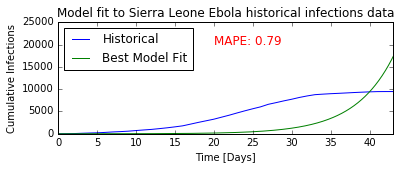

In [189]:
result = model.run({'Contact Rate': res.x[0]})

plt.figure(figsize=(6,2))
plt.plot(data.index, data['Cumulative Cases'], label='Historical')
plt.plot(result.index, result['Cumulative Cases'], label='Best Model Fit')
plt.xlim([0, max(data.index)])
plt.ylim(0,25000)
plt.xlabel('Time [Days]')
plt.ylabel('Cumulative Infections')
plt.title('Model fit to Sierra Leone Ebola historical infections data')
plt.text(20,20000,'MAPE: %.02f'%res.fun, color='r', fontsize=12)
plt.legend(loc='upper left')
plt.savefig('Ebola_SI_Best_Fit.png')

In [194]:
import scipy.optimize as opt
data = pd.read_csv('Ebola_in_SL_Data.csv', index_col='Weeks')

def test_data_fit(data, max_mape):
    model.set_components({'Total Population':5200000.0,
                          'Initial Infected':3.0})

    def mape_error(param_list):
        result = model.run({'Contact Rate': param_list[0]})
        return (abs((result - data)/data)).mean()['Cumulative Cases']

    res = opt.minimize(mape_error, 10, method='L-BFGS-B', bounds=[(0,100)])
    return res.fun < max_mape

test_data_fit(data, 0.5)

False

# Data Replication on SIR

In [206]:
model = pysd.read_vensim('SIR.mdl')

In [210]:
import scipy.optimize as opt
data = pd.read_csv('Ebola_in_SL_Data.csv', index_col='Weeks')

def test_data_fit(data, max_mape):
    model.set_components({'Total Population':5200000.0,
                          'Initial Infected':3.0})

    def mape_error(param_list):
        print param_list
        result = model.run({'Contact Rate': param_list[0], 'Recovery Time': param_list[1]})
        #print result
        return (abs((result - data)/data)).mean()['Cumulative Cases']

    res = opt.minimize(mape_error, [5,30], method='L-BFGS-B', bounds=[(0,100),(0,50)])
    print res
    return res.fun < max_mape

test_data_fit(data, 0.5)

[  5.  30.]
[  5.00000001  30.        ]
[  5.          30.00000001]
[  5.00216763  30.00006757]
[  5.00216764  30.00006757]
[  5.00216763  30.00006758]
[  5.00433742  30.00013521]
[  5.00433743  30.00013521]
[  5.00433742  30.00013522]
[  5.01301657  30.0004058 ]
[  5.01301658  30.0004058 ]
[  5.01301657  30.00040581]
[  5.04773315  30.00148813]
[  5.04773316  30.00148813]
[  5.04773315  30.00148814]
[  5.18659949  30.00581747]
[  5.1865995   30.00581747]
[  5.18659949  30.00581748]
[  5.74206485  30.02313482]
[  5.74206486  30.02313482]
[  5.74206485  30.02313483]
[  7.9639263   30.09240421]
[  7.96392631  30.09240421]
[  7.9639263   30.09240422]
[ 16.85137211  30.36948177]
[ 16.85137212  30.36948177]
[ 16.85137211  30.36948178]
[ 10.35102835  30.16682519]
[ 10.35102836  30.16682519]
[ 10.35102835  30.1668252 ]
[ 13.21799025  30.25620641]
[ 13.21799026  30.25620641]
[ 13.21799025  30.25620642]
[ 11.80208045  30.2120636 ]
[ 11.80208046  30.2120636 ]
[ 11.80208045  30.21206361]
[ 11.872

False

# Extreme Conditions Testing

In [282]:
tests = pd.read_excel('SIR_Extreme_Conditions.xlsx', index_col=[0,1])
tests

,,Infection,Recovery
Parameter,Value,,
Susceptible,0.000000,0,-
Total Population,0.000000,0,0
Infected,0.000000,0,0
Contact Rate,0.000000,0,-
Recovery Time,inf,-,0
Infectivity,0.000000,0,-


In [284]:

tests = pd.read_excel('SIR_Extreme_Conditions.xlsx', index_col=[0,1])
errors = []
for index, row in tests.iterrows(): 
    try:
        model = pysd.read_vensim('SIR.mdl')
        result = model.run(dict([index]), return_columns=row.index.values, 
                           return_timestamps=model.components.time()).iloc[0]
        
        for key, value in row.iteritems():
            if value != '-' and result[key] != value:
                errors += ['When %s = %s, %s is %s instead of %s' % (index[0], index[1], key, result[key], value)]
                
    except Exception as e:
        errors.append('When %s = %s, %s' % (index[0], index[1], e))
        
print errors

[u'When Total Population = 0.0, float division by zero']


In [290]:
tests = pd.read_excel('SIR_Extreme_Conditions.xlsx', index_col=[0,1])
errors = []
for index, row in tests.iterrows(): 
    try:
        model = pysd.read_vensim('SIR.mdl')
        result = model.run(params=dict([index]), 
                           return_columns=row.index.values, 
                           return_timestamps=0).loc[0]
        
        for key, value in row.iteritems():
            if value != '-' and result[key] != value:
                errors.append('When %s = %s, %s is %s instead of %s' % 
                              (index[0], index[1], key, result[key], value))
                
    except Exception as e:
        errors.append('When %s = %s, %s' % 
                      (index[0], index[1], e))
        
print errors

[u'When Total Population = 0.0, float division by zero']


# Thought Experiments

Contact Rate * Infectivity > 1/Recovery Time

In [357]:
def test_reproduction_rate():
    result = model.run(return_columns=['Contact Rate', 'Infectivity', 'Recovery Time', 'Infected'])
    growth_expected = (result['Contact Rate'].iloc[0] * result['Infectivity'].iloc[0] > 
                       1./result['Recovery Time'].iloc[0])
    growth_observed = result['Infected'].diff().dropna().iloc[0] >= 0
    return growth_expected == growth_observed

test_reproduction_rate()

True

In [360]:
def all_conditions(conditions, test):
    for condition in conditions:
        model.set_components(condition)
        if not test():
            print condition
            return False
    return True
        
conditions = [{'Initial Infected':i} for i in range(4)]
conditions

[{'Initial Infected': 0},
 {'Initial Infected': 1},
 {'Initial Infected': 2},
 {'Initial Infected': 3}]

In [359]:
conditions = [{'Initial Infected':i} for i in range(4)]
all_conditions(conditions, test_reproduction_rate)

# Response to parameter changes

In [313]:
model = pysd.read_vensim('SIR.mdl')
contact_rates = range(0,100,1)
model.set_components({'FINAL TIME':300})
peak_infectivity = [model.run({'Contact Rate': cr}, return_columns=['Infection']).max()
                    for cr in contact_rates]


In [329]:
runs = pd.DataFrame([model.run({'Contact Rate': cr}, return_columns=['Infection'])['Infection']
                    for cr in contact_rates]).T

(0, 100)

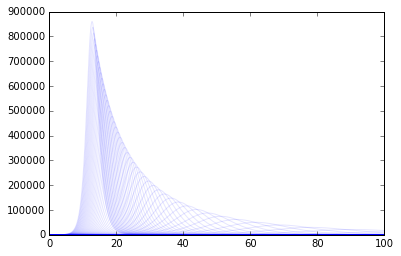

In [330]:
runs.plot(legend=False, color='b', alpha=.1)
plt.xlim(0,100)

In [ ]:
    model = pysd.read_vensim('SIR.mdl')
        model.set_components({'FINAL TIME':300})

In [342]:
from scipy import stats

In [341]:
from scipy import stats
def test_contact_rate_peak_infectivity_correlation(correlation_threshold):
    contact_rates = range(0,100,3)
    peak_infectivity = [model.run({'Contact Rate': cr}, return_columns=['Infection']).max()['Infection']
                        for cr in contact_rates]
    
    r, p = stat.pearsonr(contact_rates, peak_infectivity)
    return r > correlation_threshold and p < .05
    
test_contact_rate_peak_infectivity_correlation(.5)

True

In [336]:
import scipy.stats as stat
stat.pearsonr(contact_rates, peak_infectivity)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [337]:
contact_rates, peak_infectivity

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Infection    0.0
  dtype: float64, Infection    0.2
  dtype: float64, Infection    0.399999
  dtype: float64, Infection    0.599999
  dtype: float64, Infection    0.799998
  dtype: float64, Infection    0.999998
  dtype: float64, Infection    1.199998
  dtype: float64, Infection    1.399997
  dtype: float64, Infection    1.599997
  dtype: float64, Infection    1.799996
  dtype: float64, Infection    1.99

In [314]:
model.run({'Contact Rate': cr}, return_columns=['Infection']).max()

Infection    859910.671252
dtype: float64

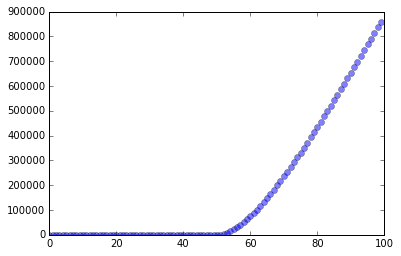

In [315]:
plt.plot(contact_rates, peak_infectivity, 'bo', alpha=.5)

In [316]:
cumulative_infections = [model.run({'Contact Rate': cr}, return_columns=['Cumulative Cases']).max()
                    for cr in contact_rates]

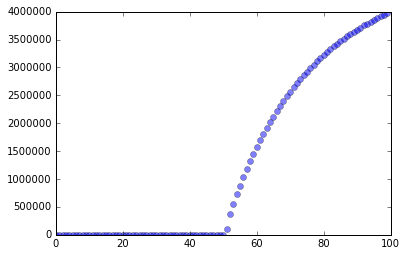

In [317]:
plt.plot(contact_rates, cumulative_infections, 'bo', alpha=.5)